In [1]:
"""
can use different unsupervised method to increase accuracy -> not necessarily dimension 3
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import os


import cv2

Start to read red mango data(you need to do PCA by yourself)

In [2]:
# preprocess image
def preprocessImg(img, new_width=30, new_height=30): # if the size is too big, a memory overflow will occur when calculating covariance
    new_dim = (new_width, new_height)
    return cv2.resize(img, new_dim, interpolation=cv2.INTER_LINEAR)

In [3]:
def PCA(data, n_components=3):
    mean_vector = np.mean(data, axis=0) # calculate the mean of each column
    std_vector = np.std(data, axis=0) # calculate standard deviation of each column
    
    
    # normalize here
    centered_data = data - mean_vector # center data by subtracting mean
    standardized_data = centered_data / std_vector
    
    
    
    cov = np.cov(standardized_data.T) # caluculate covariance matrix of centered matrix (np.cov calculates covariance of rows, thus need transpose)
    eig_values, eig_vectors = np.linalg.eig(cov) # get eigenvalues and eigenvectors
    
    
    max_indexes = []
    for i in range(0, n_components):
        maxIndex = np.argmax(eig_values)
        max_indexes.append(maxIndex)
        eig_values[maxIndex] = 0
#         if maxIndex != i:
#             print("The " + str(maxIndex) + " largest value is " + str(eig_values[maxIndex]))
        
        
    
    # final_features = np.empty(0)
    final_features = eig_vectors[:, max_indexes]
   # print(len(final_features))
    
    projected_data = (np.dot(standardized_data, final_features))
    #projected_data = (np.dot(eig_vectors.T, cov.T)).T # return projected data matrix
    
    return projected_data

In [4]:
##############  your turn  , do PCA  ##############

##############  PCA  RULES   #################
###  for drawing 3D graph  , you should make dimension = 3
### On calculating accuracy , you can set any dimension 
# hint ~ you can save the PCA result to the list ,train_red

##############  your turn  , do PCA  ##############

#sklearn is not allow!! you need to implement kmeans function step by step
##############  PCA  RULES   #################

###  for drawing 3D graph  , you should make dimension = 3
### On calculating accuracy , you can set any dimension 
# hint ~ you can save the PCA result to the list ,train_green

imgSet = []

path = './sum/green/'
files = os.listdir(path)
#train_green = []


for file in files:
    
    p = path + file
    img = cv2.imread(p)
    
    resizedImg = preprocessImg(img, 30, 30)
    imgVector = resizedImg.flatten(order='C')
    imgSet.append(imgVector)

path = './sum/red/'
files = os.listdir(path)
#train_red = []



for file in files:
    
    p = path + file
    img = cv2.imread(p)  # read each img and store in 3D array 
    
    resizedImg = preprocessImg(img, 30, 30) # resize image
    imgVector = resizedImg.flatten(order='C') # flatten image to 1D vector
    imgSet.append(imgVector) # store 1d image vectors in a list
    

    


In [5]:
    """
    
            feat.1  feat.2  feat.3 ...  feat.x
    img1
    img2
    ...
    img36
    
    
    """
imgSet = np.asarray(imgSet) # turn into nparray


transformed_data = PCA(imgSet) # do PCA on each image here

transformed_data = transformed_data.astype(float)

print(len(transformed_data))
print(len(transformed_data[0]))




"""
x   1. resize image
x   2. concatenate row by row in an image
    3. find mean of each feature
    4. center each datapoint based on each feature's mean
    5. find covariance matrix
    6. eigendecomposition of covariance meatrix
    7. rank features according to eigenvalues
"""

72
3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


"\nx   1. resize image\nx   2. concatenate row by row in an image\n3. find mean of each feature\n4. center each datapoint based on each feature's mean\n5. find covariance matrix\n6. eigendecomposition of covariance meatrix\n7. rank features according to eigenvalues\n"

show the PCA result 

this is the correct answer of your kmeans 


in the other words,your kmeans result need to as similar to this one as possible 

In [6]:
xx = []
yy = []
zz = []
for i in range(36):
    xx.append(transformed_data[i][0])
    yy.append(transformed_data[i][1])
    zz.append(transformed_data[i][2])
    
xxx = []
yyy = []
zzz = []
for i in range(36,72):
    xxx.append(transformed_data[i][0])
    yyy.append(transformed_data[i][1])
    zzz.append(transformed_data[i][2])


In [7]:
# xx=[]
# yy=[]
# zz=[]
# for i in train_red:
#     xx.append(i[0])
#     yy.append(i[1])
#     zz.append(i[2])

In [8]:
# xxx=[]
# yyy=[]
# zzz=[]
# for i in train_green:
#     xxx.append(i[0])
#     yyy.append(i[1])
#     zzz.append(i[2])

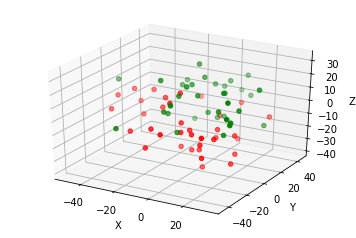

In [9]:
from mpl_toolkits.mplot3d import Axes3D



# x, y, z = data[0], data[1], data[2]
ax = plt.subplot(111, projection='3d')  

#ax.scatter(xx, yy, zz)

ax.scatter(xxx, yyy, zzz, c='r')

ax.scatter(xx, yy, zz, c='g')

ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

start to do your kmeans!

In [10]:
# Kmeans
class K_means:
    def __init__(self, n_clusters=2, tol=0.0001, max_iter=300): # tol: tolerance (if centroid is not moving more than this value)
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
    def fit(self, data, initial_centroids):
        
        self.centroids = {}
        
        for i in range(self.n_clusters): # use first data sample as initial centroid, can shuffle to increase randomness
            #self.centroids[i] = data[i] # use first data
            self.centroids[i] = data[initial_centroids[i]] # feed a list of inital centroids
        
        for i in range(self.max_iter): # begin optimization process
                self.classifications = {}
                
                for i in range(self.n_clusters):
                    self.classifications[i] = [] # each cluster is a list storing datapoints that belong to the cluster
                    
                for datapoint in data:
                    distances = [np.linalg.norm(datapoint-self.centroids[centroid]) for centroid in self.centroids]
                    classification = distances.index(min(distances))
                    self.classifications[classification].append(datapoint) # classify datapoint to cluster
                    
                prev_centroids = dict(self.centroids) # remember current centroid to compare with future centroid
                
                for classification in self.classifications:
                    self.centroids[classification] = np.average(self.classifications[classification], axis=0)  # reassign new centroid
                    
                optimized = True
                
                for c in self.centroids:
                    original_centroid = prev_centroids[c]
                    current_centroid = self.centroids[c]
                    centroidMovement = np.sum((current_centroid-original_centroid)/original_centroid*100.0)
                    if centroidMovement > self.tol:
                        optimized = False
                        
                if optimized:
                    break
                    
    def predict(self, datapoint): # classifies datapoint individually
        distances = [np.linalg.norm(datapoint - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
                    
                    
    """
    1. for each iteration find new centroid
    2. for each centroid calculate distance to each datatpoint
    3. pick min and classify each datapoint to each centroid
    4. mean all datapoints in each cluster and find new centroid
    5. keep doing until reaching max_iter or reach tolerance
    """
    
    

In [11]:
# generate inital centroids
import random

initial_centroids = []

# for i in range(2):
#     randnb = random.randrange(len(transformed_data))
#     while randnb in initial_centroids:
#         randnb = randrange(len(transformed_data))
#     initial_centroids.append(randnb)
#     print(randnb)

randnb = random.randrange(36)
initial_centroids.append(randnb)

randnb = random.randrange(36, len(transformed_data))
initial_centroids.append(randnb)

In [12]:
K_means_model = K_means()
K_means_model.fit(transformed_data, initial_centroids)

In [13]:
class1 = []
class2 = []
pred = []

for datapoint in transformed_data:
    if K_means_model.predict(datapoint) == 0:
        class1.append(datapoint)
        pred.append(0)
    else:
        class2.append(datapoint)
        pred.append(1)

In [14]:
#put all the mango data to total_train
#you need to cluster total_train
#Finally,your kmeans result should show which mango point is red mango or green mango

#1-36 is green data 
#37-72 is red data
#don't alter this order

#total_train=train_green+train_red

#this is your kmeans result!

#you need to show me your kmeans result in 3D picture like the result in video !

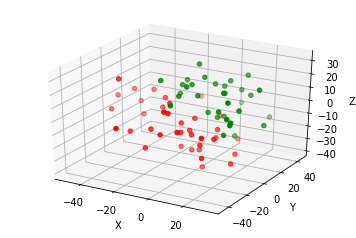

In [15]:
rxx=[]
ryy=[]
rzz=[]
for i in class1:
    rxx.append(i[0])
    ryy.append(i[1])
    rzz.append(i[2])

rxxx=[]
ryyy=[]
rzzz=[]
for i in class2:
    rxxx.append(i[0])
    ryyy.append(i[1])
    rzzz.append(i[2])

from mpl_toolkits.mplot3d import Axes3D


ax = plt.subplot(111, projection='3d') 

ax.scatter(rxx, ryy, rzz, c='g')
ax.scatter(rxxx, ryyy, rzzz, c='r')

ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

#Here is the code which calculate the accuracy of your kmeans result

In [16]:
#put all the mango data to total_train
#you need to cluster total_train
#Finally,your kmeans result should show which mango point is red mango or green mango

#1-36 is green data 
#37-72 is red data
#don't alter this order

#total_train=train_green+train_red

this is your kmeans result!

Here is the code which calculate the accuracy of your kmeans result

In [17]:
#Do your best to improve accuracy.but don't cheat by looking answer and make pred by yourself 

In [18]:
# total_train have 72 mango data
#1~36 is green mango
#37~72 is red mango
#so the correct classification answer of  mango is  ans = [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]
#1 is green
#0 is red

In [19]:
# At here ! you need to show me your kmeans result in  the list  ,pred=[]
#for example,pred may be   pred=[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#in this case,the accuracy is 0.7  .  
#6 error , 14 correct  ,  14/20= 0.7 

In [20]:
#pred=[]

In [21]:
pred=np.array(pred)

In [22]:
correct=0
error=0
ans = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
for i in range(72):
    if ans[i]==pred[i]:
        correct+=1
    if ans[i]!=pred[i]:
        error+=1

In [23]:
accuracy=correct/72

In [24]:
# automate training, run all possible combinations of starting centroids
MAX_ACCURACY = 0
max_yieldings = []
init_centroids = [ [a, b] for a in range(len(transformed_data)) for b in range(len(transformed_data))]

for initial_centroids in init_centroids:
    # generate inital centroids
#     import random

#     initial_centroids = []
    

#     randnb = random.randrange(len(transformed_data))
#     initial_centroids.append(randnb)

#     prev_randnb = randnb
#     while randnb == prev_randnb:
#         randnb = random.randrange(len(transformed_data))
#     initial_centroids.append(randnb)
    
    K_means_model = K_means()
    K_means_model.fit(transformed_data, initial_centroids)
    class1 = []
    class2 = []
    pred = []

    for datapoint in transformed_data:
        if K_means_model.predict(datapoint) == 0:
            class1.append(datapoint)
            pred.append(0)
        else:
            class2.append(datapoint)
            pred.append(1)
            
    pred=np.array(pred)
    del K_means_model

    correct=0
    error=0
    ans = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    for i in range(72):
        if ans[i]==pred[i]:
            correct+=1
        if ans[i]!=pred[i]:
            error+=1
    accuracy=correct/72
    
#     if accuracy >= 0.9:
#         print("Accuracy: " + str(accuracy))
#         print(initial_centroids)
#         print("")
    
    if accuracy == MAX_ACCURACY:
        max_yieldings.append(initial_centroids)
    elif accuracy > MAX_ACCURACY:
        MAX_ACCURACY = accuracy
        max_yieldings.clear()
        max_yieldings.append(initial_centroids)

print(MAX_ACCURACY)

print(max_yieldings)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:1128: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


dropping: 0
dropping: 0.5
dropping: 0.5416666666666666
dropping: 0.5694444444444444
dropping: 0.6388888888888888
dropping: 0.6527777777777778
dropping: 0.75
dropping: 0.7916666666666666
dropping: 0.8611111111111112
dropping: 0.9166666666666666
0.9444444444444444
[[34, 7], [34, 8], [34, 10], [34, 11], [34, 19], [40, 32], [42, 19], [42, 20], [42, 27], [42, 35], [43, 24], [43, 26], [45, 20], [48, 7], [48, 11], [48, 19], [48, 20], [51, 4], [56, 0], [56, 18], [56, 20], [56, 27], [61, 23], [61, 25], [62, 7], [62, 8], [62, 10], [62, 14], [62, 19], [62, 20], [64, 5], [64, 24], [66, 24], [67, 0], [67, 20], [67, 27], [68, 24], [70, 1], [70, 11], [70, 16], [70, 24], [70, 26], [70, 29], [70, 30], [70, 33], [71, 18], [71, 19]]


submit your pred=[......] to kaggle and look your rank